Holt-Winters 指數平滑模型的要點：
Holt-Winters 模型是一種時間序列預測模型，適用於帶有趨勢和季節性的時間序列數據。
參數設置：
seasonal='add' 表示使用加法季節性模型（適合季節性變動不隨時間增大）。
seasonal_periods=52 指定了季節性周期為 52 周，適合於按週觀察的年周期數據。
該模型利用過去的趨勢和季節性變化來進行銷售預測

In [3]:
# 查看數據框的結構和缺失值
print(ur.head())
print(ur.tail())
# 查看每家商店的唯一值
unique_stores = ur['Store'].unique()
print(f"Unique stores: {unique_stores}")

# 計算有多少家不同的店
num_stores = len(unique_stores)
print(f"There are {num_stores} unique stores in the dataset.")


NameError: name 'ur' is not defined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      1

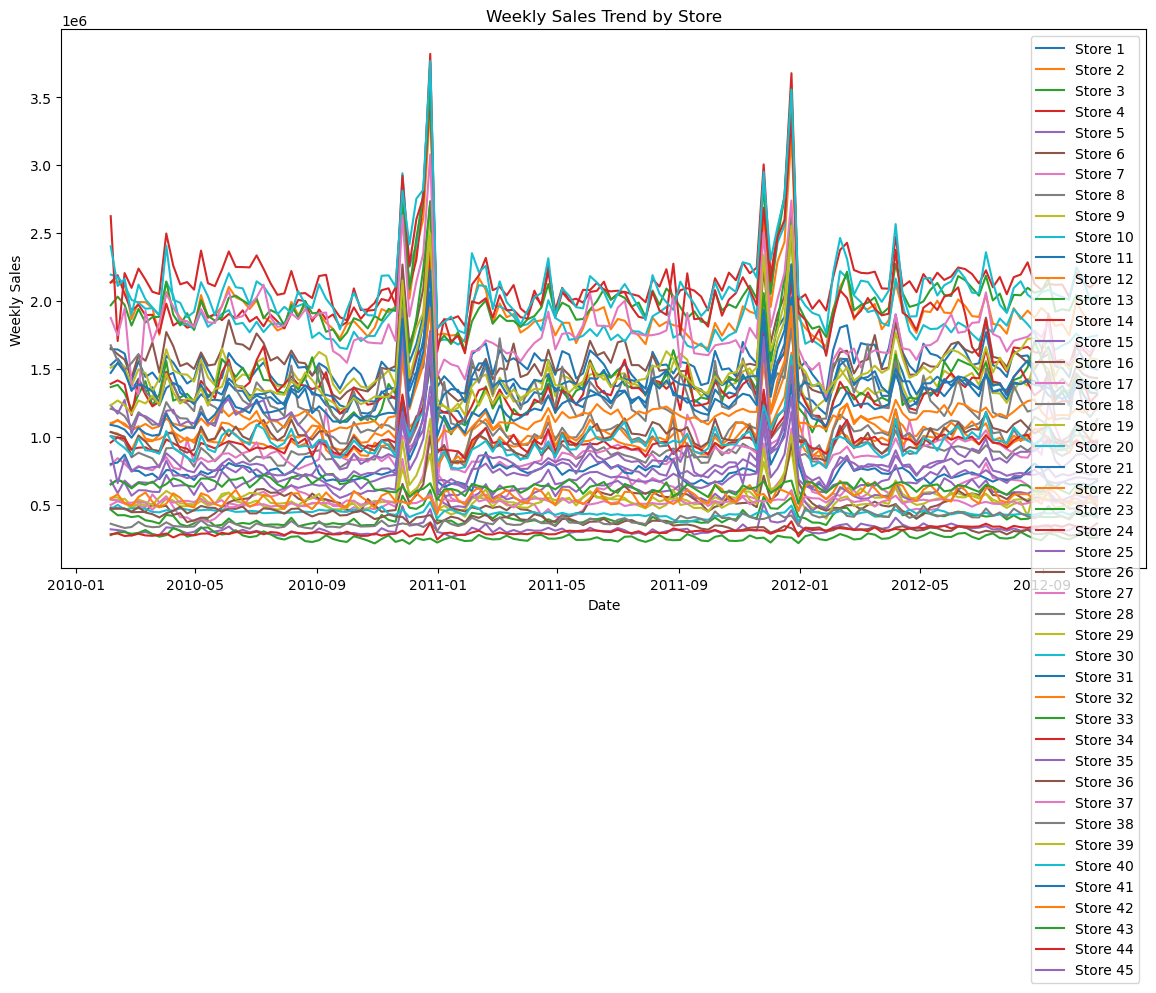

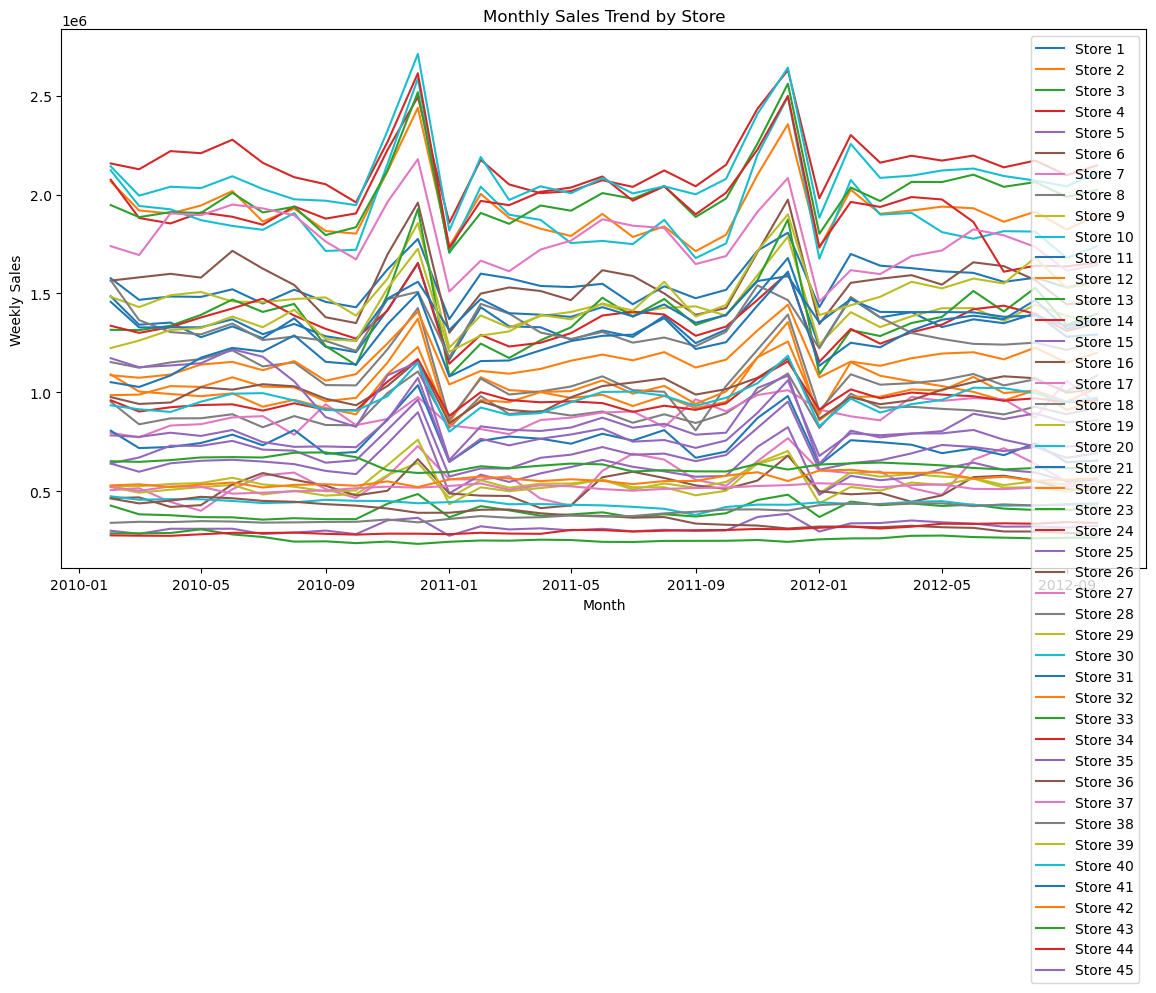

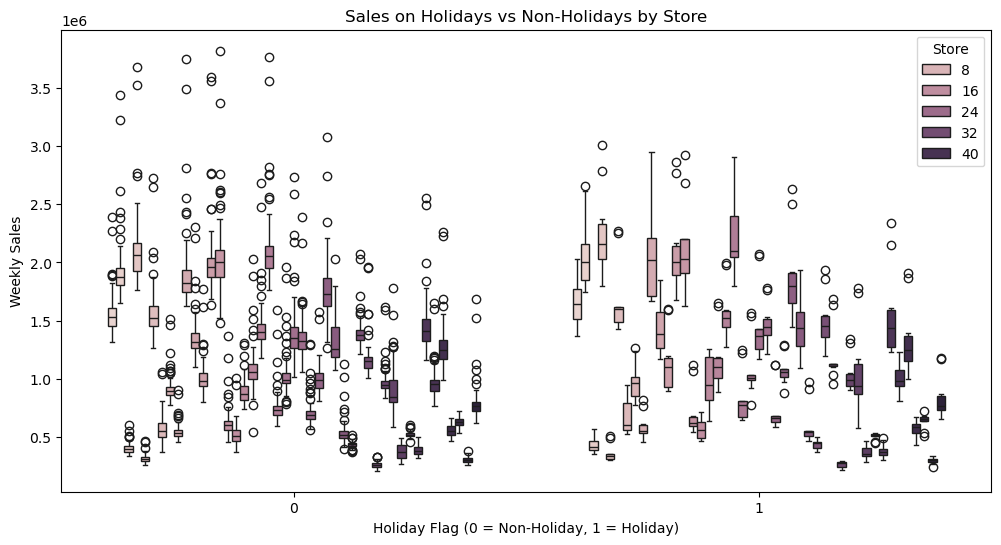

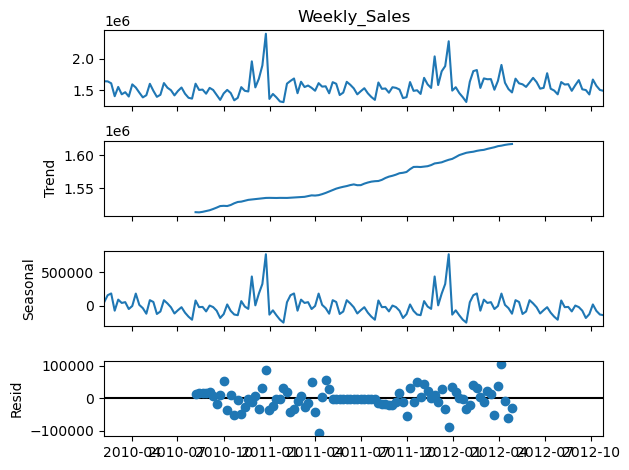

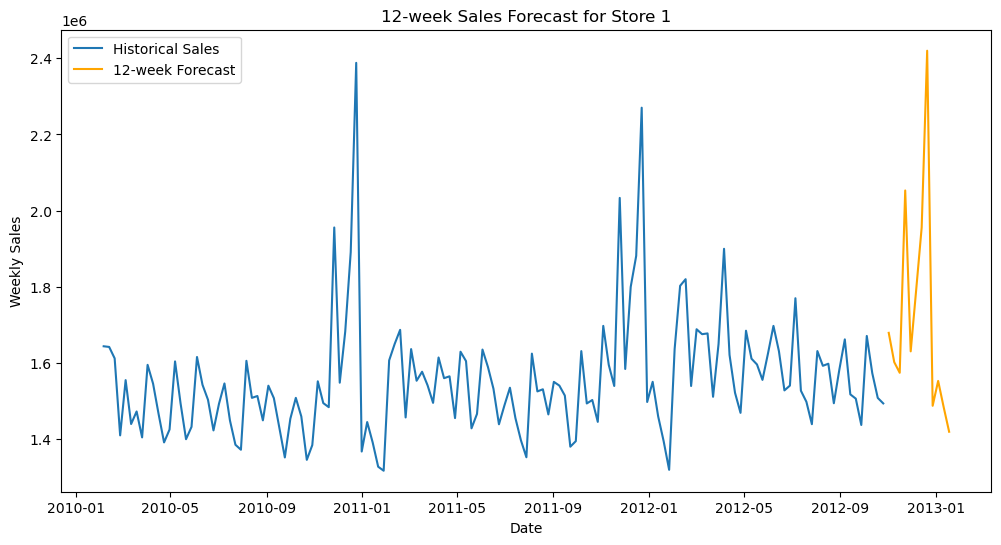

Descriptive Statistics for Weekly_Sales
count    1.430000e+02
mean     1.925751e+06
std      2.376837e+05
min      1.650394e+06
25%      1.803501e+06
50%      1.879107e+06
75%      1.956927e+06
max      3.436008e+06
Name: Weekly_Sales, dtype: float64


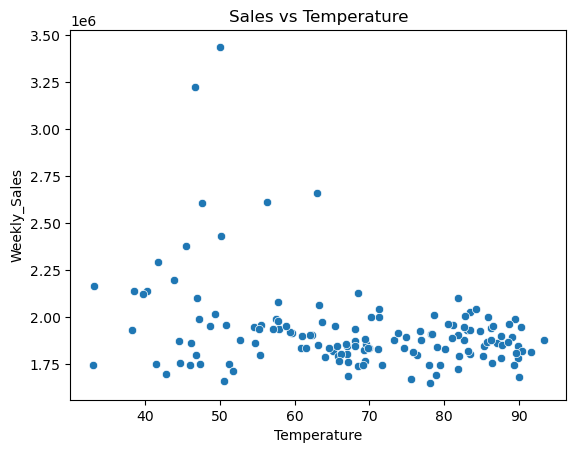

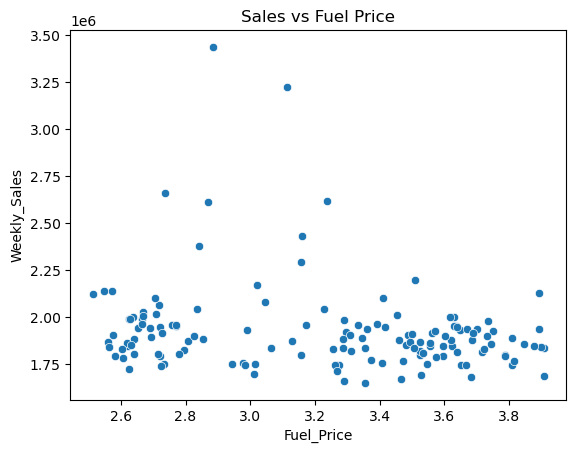

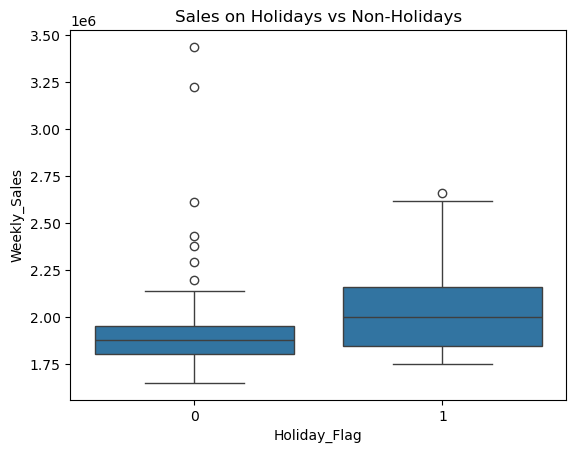

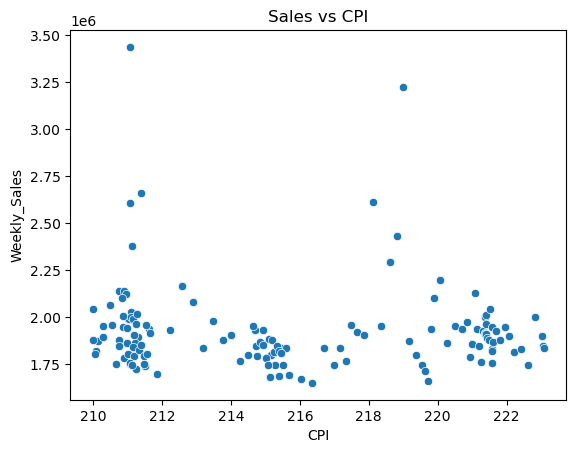

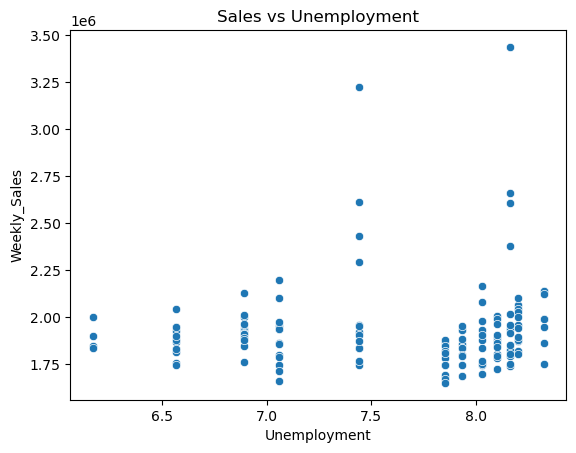

In [5]:
# 加載所需的 Python 庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings("ignore")

# 設置文件路徑並讀取數據
file_path = "C:/Users/User/Desktop/8811 Data Analytics & Intelligence/Week3/Walmart.csv"
ur = pd.read_csv(file_path)

# 查看數據框的結構和缺失值
print(ur.info())
print(ur.isnull().sum())

# 查看數據的描述性統計
print(ur.describe())

# 查看每家商店的唯一值
unique_stores = ur['Store'].unique()
print(f"Unique stores: {unique_stores}")

# 計算有多少家不同的店
num_stores = len(unique_stores)
print(f"There are {num_stores} unique stores in the dataset.")

# 按商店分組，查看 Weekly_Sales 的描述性統計
store_sales_summary = ur.groupby('Store')['Weekly_Sales'].describe()
print(store_sales_summary)

# 按商店繪製 Weekly_Sales 的箱線圖
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=ur)
plt.title("Weekly Sales Distribution by Store")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.show()

# 日期轉換
ur['Date'] = pd.to_datetime(ur['Date'], format='%d-%m-%Y')

# 按商店繪製銷售趨勢折線圖
plt.figure(figsize=(14, 7))
for store in unique_stores:
    store_data = ur[ur['Store'] == store]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}')
plt.title("Weekly Sales Trend by Store")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# 按商店繪製銷售與溫度的散點圖
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', hue='Store', data=ur, palette='viridis')
plt.title("Sales vs Temperature by Store")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

# 提取月份
ur['Month'] = ur['Date'].dt.to_period("M")

# 按商店和月份繪製銷售趨勢
plt.figure(figsize=(14, 7))
for store in unique_stores:
    monthly_data = ur[ur['Store'] == store].groupby('Month')['Weekly_Sales'].mean()
    plt.plot(monthly_data.index.to_timestamp(), monthly_data, label=f'Store {store}')
plt.title("Monthly Sales Trend by Store")
plt.xlabel("Month")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# 按商店和節假日標誌繪製銷售箱線圖
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', hue='Store', data=ur)
plt.title("Sales on Holidays vs Non-Holidays by Store")
plt.xlabel("Holiday Flag (0 = Non-Holiday, 1 = Holiday)")
plt.ylabel("Weekly Sales")
plt.legend(title="Store")
plt.show()

# 選取 Store 1 進行分析
ur_store1 = ur[ur['Store'] == 1]

# 確保 Store 1 的 Weekly_Sales 是時間序列
ur_store1_sales = ur_store1.set_index('Date')['Weekly_Sales']

# 時間序列分解
decomposition = seasonal_decompose(ur_store1_sales, model='additive', period=52)
decomposition.plot()
plt.show()

# 使用 Holt-Winters 指數平滑進行未來 52 週的銷售預測
model = ExponentialSmoothing(ur_store1_sales, seasonal='add', seasonal_periods=52)
fit = model.fit()
forecast = fit.forecast(12)

# 繪製預測結果
plt.figure(figsize=(12, 6))
plt.plot(ur_store1_sales, label="Historical Sales")
plt.plot(forecast, label="12-week Forecast", color='orange')
plt.title("12-week Sales Forecast for Store 1")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# 定義 EDA 函數
def eda_analysis(data):
    print("Descriptive Statistics for Weekly_Sales")
    print(data['Weekly_Sales'].describe())

    # Sales vs Temperature
    sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
    plt.title("Sales vs Temperature")
    plt.show()

    # Sales vs Fuel Price
    sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
    plt.title("Sales vs Fuel Price")
    plt.show()

    # Sales vs Holiday Flag
    sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
    plt.title("Sales on Holidays vs Non-Holidays")
    plt.show()

    # Sales vs CPI
    sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
    plt.title("Sales vs CPI")
    plt.show()

    # Sales vs Unemployment
    sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
    plt.title("Sales vs Unemployment")
    plt.show()

# 調用 EDA 函數分析 Store 1
eda_analysis(ur[ur['Store'] == 2])


SARIMA（季節性ARIMA）
特點：在 ARIMA 的基礎上增加了季節性成分，適合處理具有周期性或季節性的數據。
優勢：可以捕捉數據中的趨勢、季節性和隨機波動，並適合於含有不同季節周期的數據。
適用情況：當數據具有穩定的長期趨勢和清晰的季節性週期（例如銷售的年度週期）時。


In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA模型設置，參數需根據 ACF、PACF 或者自動選取
sarima_model = SARIMAX(ur_store1_sales, order=(1,1,1), seasonal_order=(1,1,1,52))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=52)


In [13]:
# 創建包含預測值的 DataFrame，並將預測值四捨五入到小數點後兩位
forecast_df = pd.DataFrame({'Date': sarima_forecast.index, 'Forecasted Sales': sarima_forecast.values.round(2)})

# 提取年、月、週
forecast_df['Year'] = forecast_df['Date'].dt.year
forecast_df['Month'] = forecast_df['Date'].dt.month
forecast_df['Week'] = forecast_df['Date'].dt.isocalendar().week

# 重新排列列的順序
forecast_df = forecast_df[['Year', 'Month', 'Week', 'Forecasted Sales']]

# 顯示生成的預測表格
print(forecast_df)

# 將 forecast_df 資料表存成 Excel 檔案
forecast_df.to_excel('C:/Users/user/Desktop/forecasted_sales.xlsx', index=False)

    Year  Month  Week  Forecasted Sales
0   2012     11    44        1699615.36
1   2012     11    45        1615761.81
2   2012     11    46        1571582.65
3   2012     11    47        1986673.06
4   2012     11    48        1610330.38
5   2012     12    49        1787382.68
6   2012     12    50        1863508.81
7   2012     12    51        2197807.73
8   2012     12    52        1531823.88
9   2013      1     1        1577988.60
10  2013      1     2        1504456.65
11  2013      1     3        1454998.40
12  2013      1     4        1430623.32
13  2013      2     5        1770226.07
14  2013      2     6        1899157.83
15  2013      2     7        1912803.00
16  2013      2     8        1676842.66
17  2013      3     9        1807005.29
18  2013      3    10        1787078.39
19  2013      3    11        1791493.30
20  2013      3    12        1659206.81
21  2013      3    13        1772272.31
22  2013      4    14        1966713.33
23  2013      4    15        1747221.22


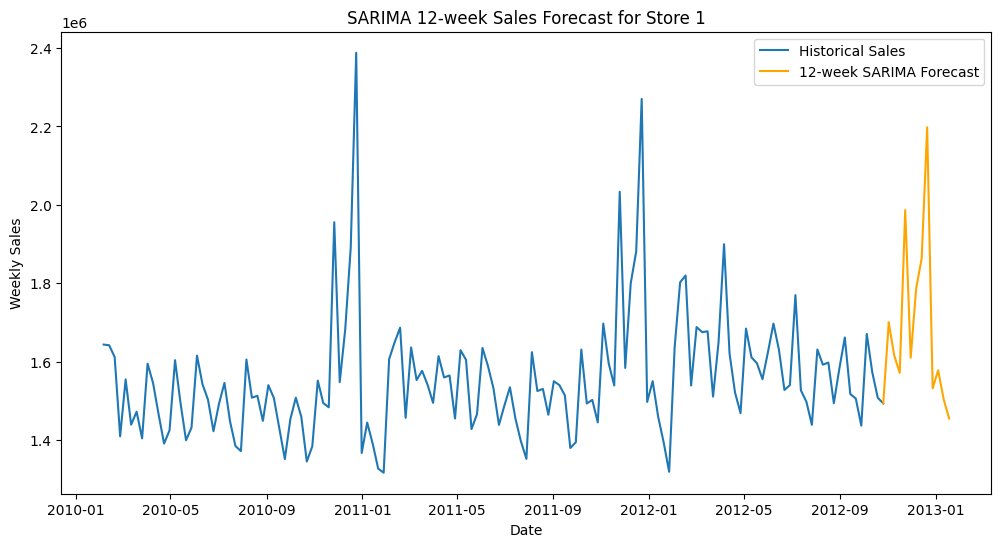

In [16]:
import matplotlib.pyplot as plt

# 設定圖表大小
plt.figure(figsize=(12, 6))

# 繪製歷史銷售數據
plt.plot(ur_store1_sales, label="Historical Sales")

# 繪製 SARIMA 預測結果
plt.plot(sarima_forecast, label="12-week SARIMA Forecast", color='orange')

# 繪製最後一個歷史點和第一個預測點之間的連接線
last_point = ur_store1_sales.iloc[-1]
first_forecast = sarima_forecast.iloc[0]
plt.plot([ur_store1_sales.index[-1], sarima_forecast.index[0]], [last_point, first_forecast], color='orange')

# 添加圖例和標題
plt.title("SARIMA 12-week Sales Forecast for Store 1")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()

# 顯示圖表
plt.show()


17:07:32 - cmdstanpy - INFO - Chain [1] start processing
17:07:32 - cmdstanpy - INFO - Chain [1] done processing


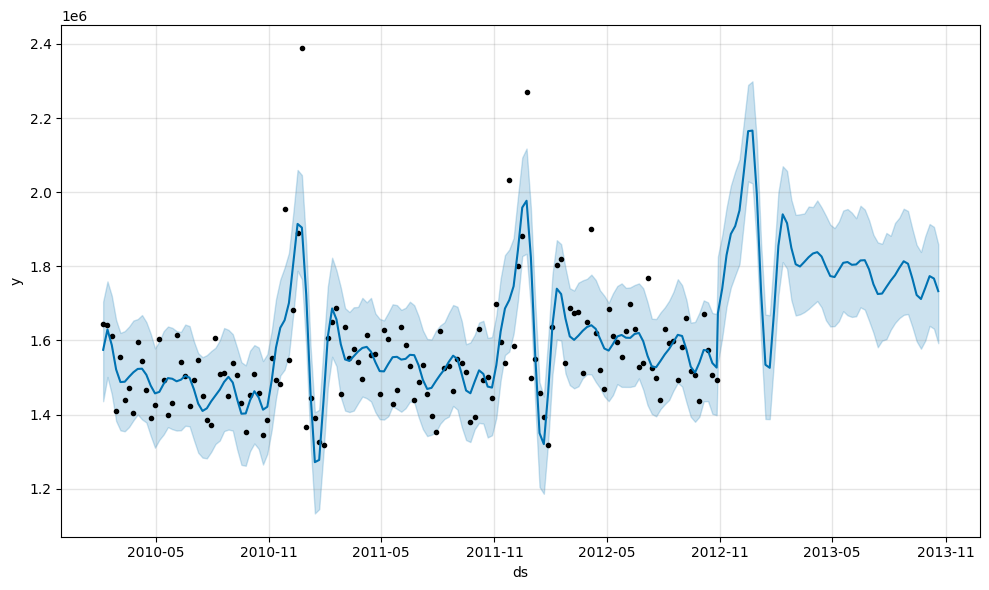

In [ ]:
from prophet import Prophet

# 將日期轉換為 Prophet 所需的格式
ur_store1['Date'] = pd.to_datetime(ur_store1['Date'])
prophet_data = ur_store1[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# 定義模型並訓練
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.fit(prophet_data)

# 創建未來52週的日期
future = prophet_model.make_future_dataframe(periods=52, freq='W')
prophet_forecast = prophet_model.predict(future)

# 繪製預測結果
prophet_model.plot(prophet_forecast)
plt.show()



In [14]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Example training data (weekly)
data = {
    'Date': pd.date_range(start='2020-01-01', periods=52, freq='W'),
    'Sales': [150 + i * 5 + (i % 4) * 10 for i in range(52)]  # Simulated sales data
}
train_data = pd.Series(data['Sales'], index=data['Date'])

# Split training and test data
train = train_data[:-4]
test = train_data[-4:]

# Ensure sufficient training data
if len(train) < 4:  # Assume at least 4 weeks of data are needed to train the model
    print("Not enough data to train the model")
else:
    try:
        # Train SARIMA model
        sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
        sarima_fit = sarima_model.fit(disp=False)

        # Forecast the next 4 weeks
        forecast = sarima_fit.forecast(steps=4)
        print("Forecast for the next 4 weeks:")
        print(forecast)

        # Compare with test data
        mse = mean_squared_error(test, forecast)
        rmse = np.sqrt(mse)
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
    except Exception as e:
        print(f"Error during model training or forecasting: {e}")

Forecast for the next 4 weeks:
2020-12-06    390.0
2020-12-13    405.0
2020-12-20    420.0
2020-12-27    435.0
Freq: W-SUN, Name: predicted_mean, dtype: float64
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      1

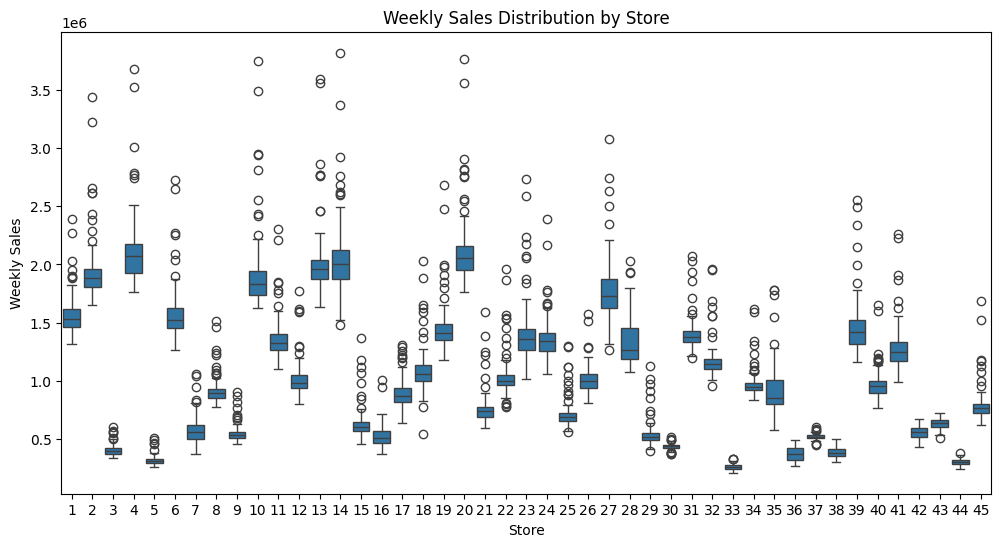

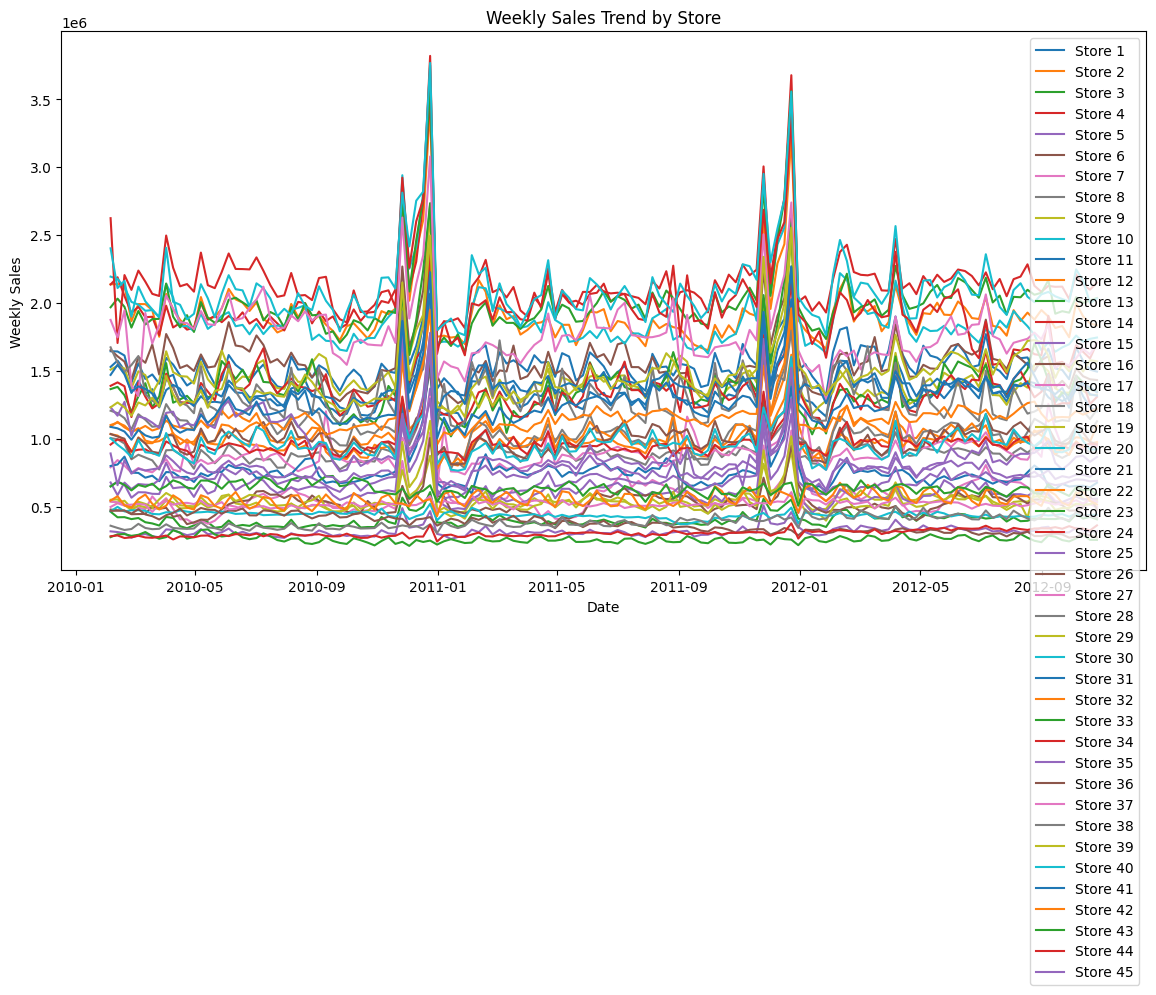

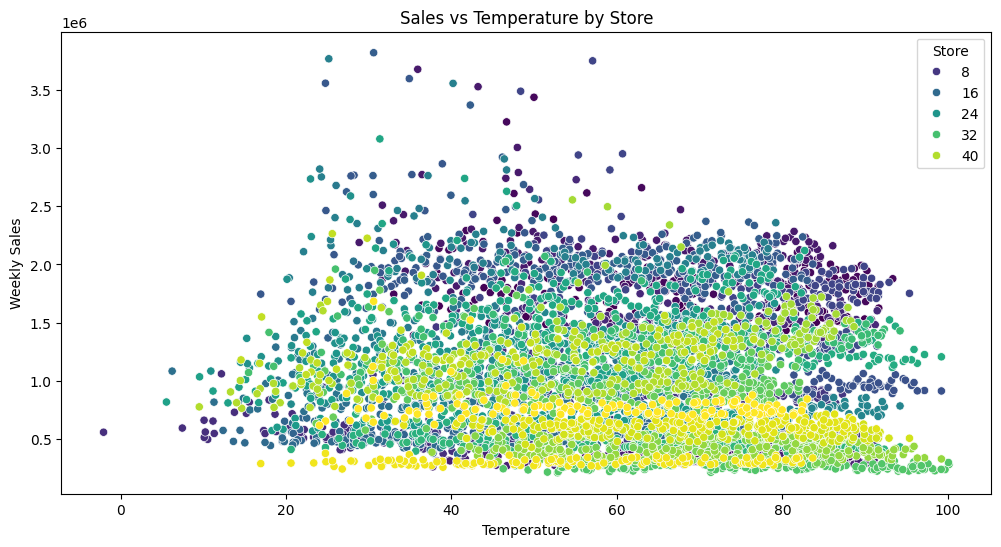

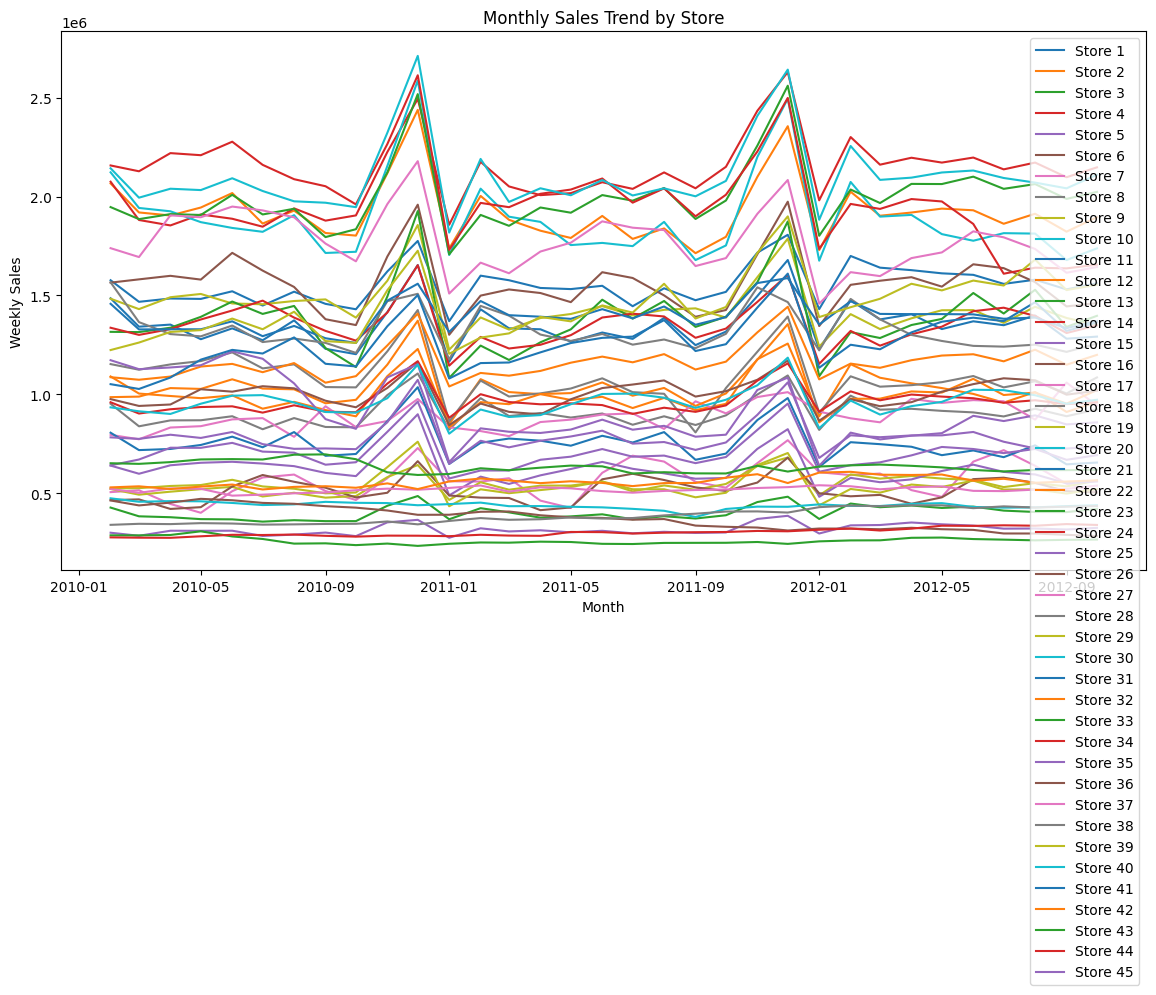

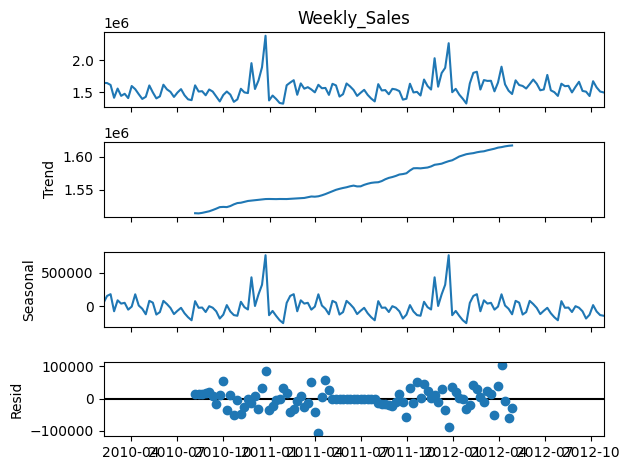

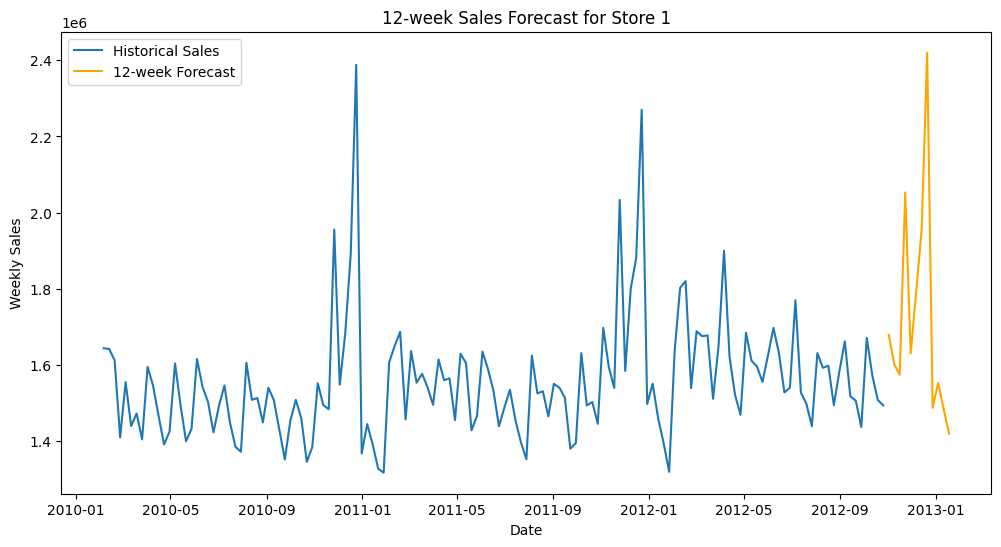

Descriptive Statistics for Weekly_Sales
count    1.430000e+02
mean     1.925751e+06
std      2.376837e+05
min      1.650394e+06
25%      1.803501e+06
50%      1.879107e+06
75%      1.956927e+06
max      3.436008e+06
Name: Weekly_Sales, dtype: float64


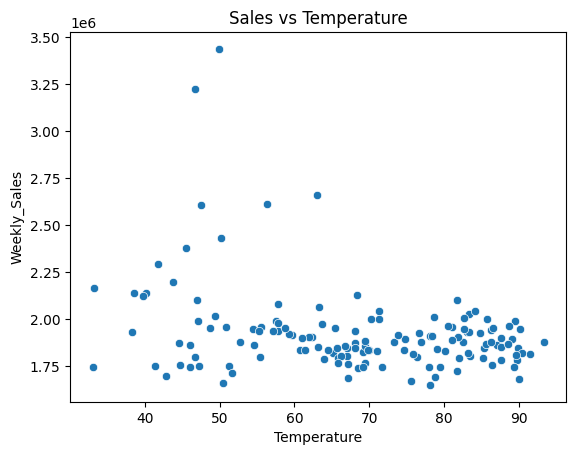

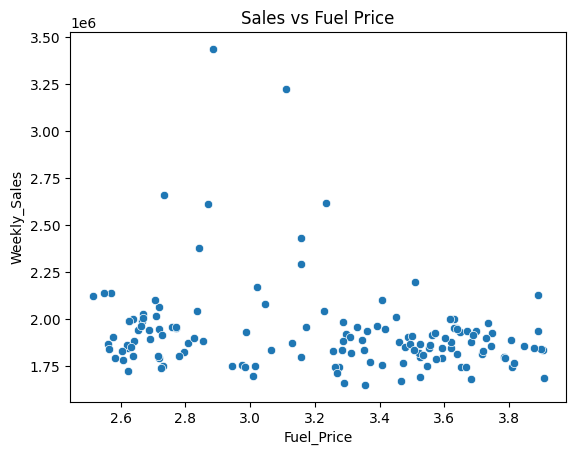

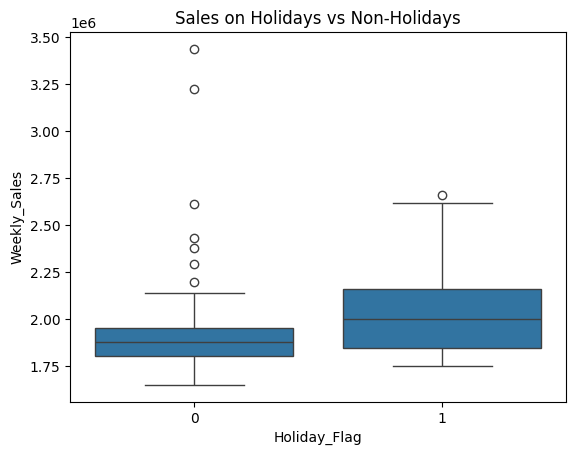

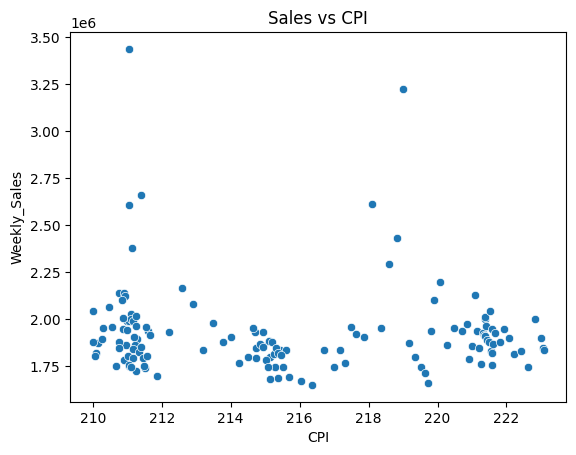

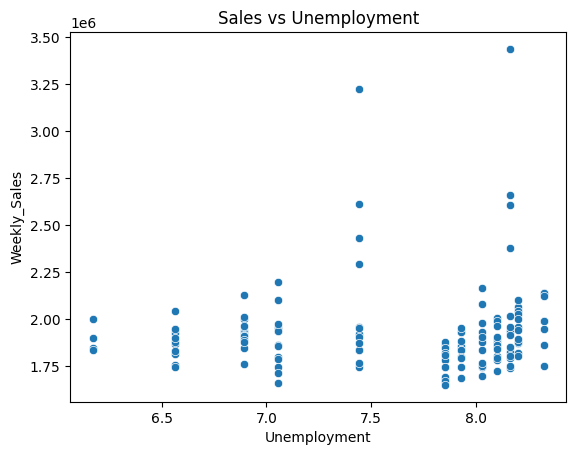

In [5]:
# 加載所需的 Python 庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings("ignore")

# 設置文件路徑並讀取數據
file_path = "C:/Users/User/Desktop/8811 Data Analytics & Intelligence/Week3/Walmart.csv"
ur = pd.read_csv(file_path)

# 查看數據框的結構和缺失值
print(ur.info())
print(ur.isnull().sum())

# 查看數據的描述性統計
print(ur.describe())

# 查看每家商店的唯一值
unique_stores = ur['Store'].unique()
print(f"Unique stores: {unique_stores}")

# 計算有多少家不同的店
num_stores = len(unique_stores)
print(f"There are {num_stores} unique stores in the dataset.")

# 按商店分組，查看 Weekly_Sales 的描述性統計
store_sales_summary = ur.groupby('Store')['Weekly_Sales'].describe()
print(store_sales_summary)

# 按商店繪製 Weekly_Sales 的箱線圖
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=ur)
plt.title("Weekly Sales Distribution by Store")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.show()

# 日期轉換
ur['Date'] = pd.to_datetime(ur['Date'], format='%d-%m-%Y')

# 按商店繪製銷售趨勢折線圖
plt.figure(figsize=(14, 7))
for store in unique_stores:
    store_data = ur[ur['Store'] == store]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}')
plt.title("Weekly Sales Trend by Store")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# 按商店繪製銷售與溫度的散點圖
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', hue='Store', data=ur, palette='viridis')
plt.title("Sales vs Temperature by Store")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

# 提取月份
ur['Month'] = ur['Date'].dt.to_period("M")

# 按商店和月份繪製銷售趨勢
plt.figure(figsize=(14, 7))
for store in unique_stores:
    monthly_data = ur[ur['Store'] == store].groupby('Month')['Weekly_Sales'].mean()
    plt.plot(monthly_data.index.to_timestamp(), monthly_data, label=f'Store {store}')
plt.title("Monthly Sales Trend by Store")
plt.xlabel("Month")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# 按商店和節假日標誌繪製銷售箱線圖
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', hue='Store', data=ur)
plt.title("Sales on Holidays vs Non-Holidays by Store")
plt.xlabel("Holiday Flag (0 = Non-Holiday, 1 = Holiday)")
plt.ylabel("Weekly Sales")
plt.legend(title="Store")
plt.show()

# 選取 Store 1 進行分析
ur_store1 = ur[ur['Store'] == 1]

# 確保 Store 1 的 Weekly_Sales 是時間序列
ur_store1_sales = ur_store1.set_index('Date')['Weekly_Sales']

# 時間序列分解
decomposition = seasonal_decompose(ur_store1_sales, model='additive', period=52)
decomposition.plot()
plt.show()

# 使用 Holt-Winters 指數平滑進行未來 52 週的銷售預測
model = ExponentialSmoothing(ur_store1_sales, seasonal='add', seasonal_periods=52)
fit = model.fit()
forecast = fit.forecast(12)

# 繪製預測結果
plt.figure(figsize=(12, 6))
plt.plot(ur_store1_sales, label="Historical Sales")
plt.plot(forecast, label="12-week Forecast", color='orange')
plt.title("12-week Sales Forecast for Store 1")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# 定義 EDA 函數
def eda_analysis(data):
    print("Descriptive Statistics for Weekly_Sales")
    print(data['Weekly_Sales'].describe())

    # Sales vs Temperature
    sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
    plt.title("Sales vs Temperature")
    plt.show()

    # Sales vs Fuel Price
    sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
    plt.title("Sales vs Fuel Price")
    plt.show()

    # Sales vs Holiday Flag
    sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
    plt.title("Sales on Holidays vs Non-Holidays")
    plt.show()

    # Sales vs CPI
    sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
    plt.title("Sales vs CPI")
    plt.show()

    # Sales vs Unemployment
    sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
    plt.title("Sales vs Unemployment")
    plt.show()

# 調用 EDA 函數分析 Store 1
eda_analysis(ur[ur['Store'] == 2])


21:20:36 - cmdstanpy - INFO - Chain [1] start processing
21:20:36 - cmdstanpy - INFO - Chain [1] done processing


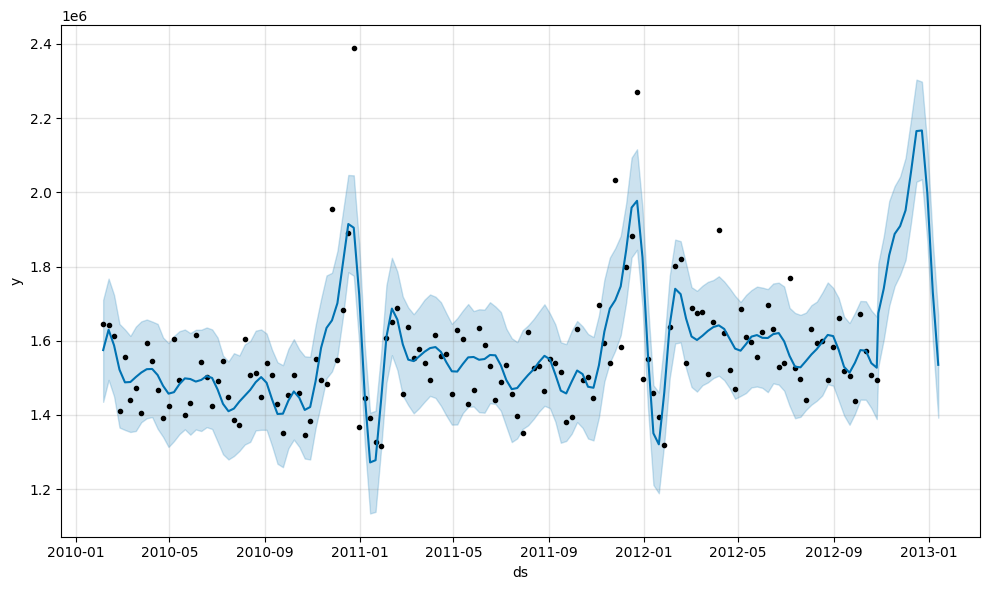

In [7]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 将日期转换为 Prophet 所需的格式
# 選取 Store 1 進行分析

ur_store1['Date'] = pd.to_datetime(ur_store1['Date'])
prophet_data = ur_store1[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# 定义假期信息
holidays = pd.DataFrame({
    'holiday': 'holiday_name',
    'ds': pd.to_datetime(['2010-12-25', '2011-12-25', '2012-12-25']),  # 假设圣诞节影响较大
    'lower_window': 0,
    'upper_window': 1,
})

# 定义并训练 Prophet 模型
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, holidays=holidays)
prophet_model.fit(prophet_data)

# 创建未来 52 周的日期
future = prophet_model.make_future_dataframe(periods=12, freq='W')
prophet_forecast = prophet_model.predict(future)

# 绘制预测结果
prophet_model.plot(prophet_forecast)
plt.show()


LSTM（長短期記憶網絡）
特點：LSTM 是一種深度學習模型，擅長捕捉長期和短期的時間序列模式。
優勢：對於包含非線性模式或複雜模式的數據有較好效果，尤其適合非線性和長期依賴數據。
適用情況：數據的模式複雜，具有長期依賴性和非線性模式，並且需要進行較大數據量的預測時。

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 設定時間步數和特徵數量
n_steps = 10  # 您可以根據需求更改步長
n_features = 1

# 正規化數據
scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(ur_store1[['Weekly_Sales']])

# 準備 X 和 y
X, y = [], []
for i in range(len(scaled_sales) - n_steps):
    X.append(scaled_sales[i:i + n_steps])  # 前 n_steps 作為輸入
    y.append(scaled_sales[i + n_steps])    # 第 n_steps+1 作為標籤

# 轉換成 numpy 陣列
X, y = np.array(X), np.array(y)

# 檢查 X 的形狀，應為 (samples, timesteps, features)
print("X shape:", X.shape)
print("y shape:", y.shape)

# 創建 LSTM 模型結構
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, n_features)),
    Dense(1)
])

# 編譯和訓練模型
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=1)


X shape: (133, 10, 1)
y shape: (133, 1)
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0770
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0539 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0299 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


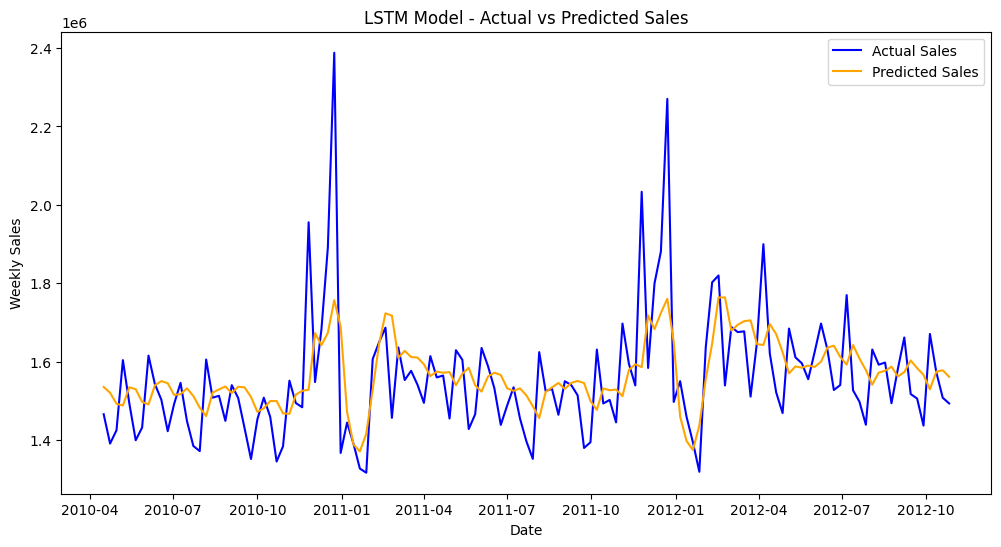

In [22]:
# 提取日期信息
dates = ur_store1['Date'].values[n_steps:]  # 跳過前 n_steps 因為它們無法用作輸入

# 使用模型進行預測
train_predictions = model.predict(X)

# 將數據逆縮放到原始比例
train_predictions = scaler.inverse_transform(train_predictions)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# 繪製實際數據和預測數據
plt.figure(figsize=(12, 6))
plt.plot(dates, y_actual, label="Actual Sales", color='blue')
plt.plot(dates, train_predictions, label="Predicted Sales", color='orange')
plt.title("LSTM Model - Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


季節性分解+ARIMA
特點：將時間序列分解為趨勢、季節性和殘差三部分，然後用 ARIMA 模型預測殘差部分。
優勢：將數據分解後單獨處理，這種方法能更準確地處理趨勢和季節成分。
適用情況：數據存在明顯的趨勢和季節性，可以通過分解來更精確地建模。

2011-05-06    1.547301e+06
2011-05-13    1.549666e+06
2011-05-20    1.551168e+06
2011-05-27    1.552451e+06
2011-06-03    1.553544e+06
                  ...     
2013-03-29   -9.702561e+02
2013-04-05   -9.702561e+02
2013-04-12   -9.702561e+02
2013-04-19   -9.702561e+02
2013-04-26   -9.702561e+02
Length: 104, dtype: float64


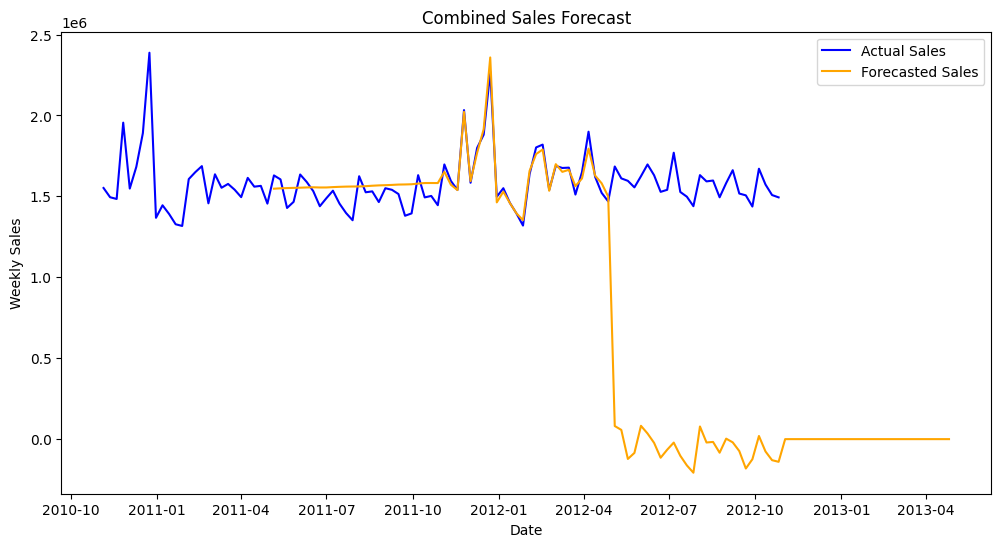

In [28]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# 分解時間序列
decomposition = seasonal_decompose(ur_store1_sales, model='additive', period=52)
trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal.dropna()
resid = decomposition.resid.dropna()

# 使用 ARIMA 模型對殘差進行預測
arima_model = ARIMA(resid, order=(1, 0, 1)).fit()
arima_forecast = arima_model.forecast(steps=52)

# 確保趨勢和季節性的長度一致，然後合併預測
trend = trend[-52:]
seasonal = seasonal[-52:]
forecast_combined = trend.add(seasonal, fill_value=0).add(arima_forecast, fill_value=0)

# 檢查 forecast_combined 是否包含 NaN，並打印其內容
print(forecast_combined)

# 繪製預測結果
plt.figure(figsize=(12, 6))
plt.plot(ur_store1_sales.index[-104:], ur_store1_sales[-104:], label='Actual Sales', color='blue')
plt.plot(forecast_combined.index, forecast_combined, label='Forecasted Sales', color='orange')
plt.title("Combined Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


看來您的預測結果不夠準確，尤其是從2012年中期開始，預測值突然下降到接近零。這可能是因為 ARIMA 模型並沒有很好地捕捉到殘差的模式，導致預測結果過於平滑或趨近於零。這種情況可能是由以下幾個原因引起的：

可能原因與解決建議
ARIMA 模型參數不適合

使用 ARIMA 模型時，選擇適當的 p、d 和 q 參數非常重要。如果參數選擇不當，可能導致模型無法捕捉數據的波動性。可以通過 ACF（自相關函數）和 PACF（偏自相關函數）圖來幫助選擇適合的參數，或考慮使用自動 ARIMA（如 pmdarima 庫中的 auto_arima）來優化參數。
季節性模式不足

在預測銷售數據時，季節性通常會對結果有很大影響。可以考慮直接使用 SARIMA（季節性 ARIMA）模型，而不是分解後再使用 ARIMA 來預測殘差。這樣可以讓模型直接捕捉數據的季節性波動。
分解方法的局限性

使用季節性分解後，再單獨預測殘差可能會導致預測結果失真。可以嘗試不使用分解方法，直接用 ARIMA 或 SARIMA 模型對整個時間序列進行建模。
嘗試 Prophet 模型

如果 ARIMA 模型效果不好，可以考慮使用 Prophet 模型。Prophet 是 Facebook 開發的開源工具，特別適合具有明顯季節性和趨勢的時間序列數據，並且在處理假日影響時也非常有效。

選擇模型的建議
SARIMA 或 Prophet：當您的數據有季節性和趨勢，且模式相對穩定時，這兩個模型能提供良好的預測。
LSTM：當數據的模式較為複雜，含有非線性或需要處理長期依賴時，可以考慮 LSTM，雖然訓練過程更複雜。
季節性分解 + ARIMA：如果您的數據模式明顯，可以分解出趨勢和季節性並單獨處理，這樣能夠更加精細地控制預測結果。

1. 數據特性
季節性和趨勢：如果數據有明顯的季節性和趨勢（如超市銷售中的節假日高峰），那麼 SARIMA 和 Prophet 這類能捕捉季節性和趨勢的模型會更合適。
非線性和長期依賴：如果數據模式複雜且有非線性、長期依賴的特性，像 LSTM 這樣的深度學習模型能更好地捕捉這些特徵。
2. 解釋性
商業應用需求：有時候，我們需要向管理層解釋模型的預測邏輯，特別是影響銷售的主要因素。SARIMA 和 Prophet 等傳統模型的解釋性更強，因為它們的組成成分（趨勢、季節性、隨機性）比較直觀，易於理解。
黑盒問題：LSTM 雖然在捕捉複雜模式方面很強大，但屬於「黑盒模型」，不易解釋，因此在需要強解釋性的場景中可能不如傳統模型適合。
3. 計算資源和效率
計算成本：LSTM 模型訓練需要大量計算資源和時間，而 SARIMA 和 Prophet 的計算成本較低，訓練速度較快。對於快速更新和預測頻率較高的應用場景，低計算成本的模型更具優勢。
模型更新：如果數據頻繁更新，且需要快速反應，Prophet 和 SARIMA 因為相對簡單，能快速重訓並更新結果。
4. 數據量
數據量大小：傳統的時間序列模型（如 SARIMA 和 Prophet）對數據量需求相對較小，數據少時也能得到相對穩定的結果；而深度學習模型（如 LSTM）需要大量數據來進行訓練，否則會容易過擬合或效果不佳。
5. 準確性與穩定性
模型穩定性：模型不僅僅需要準確性，還需要在不同時間段有穩定的表現。某些情況下，過度追求準確性會導致模型在不同季節或特殊事件中表現不穩定。
簡單模型 vs 複雜模型：簡單的模型（如 Holt-Winters 或 SARIMA）可能在準確性上略有欠缺，但表現更穩定。而複雜的模型（如 LSTM）可能在某些特定數據上更準確，但容易隨數據變動而波動。
結論
在選擇模型時，準確性當然是一個重要因素，但還需要考慮數據特性、解釋性、計算資源需求、數據量以及模型的穩定性等因素。 在一些應用場景中，穩定性、解釋性和計算效率可能比極致的準確性更重要。


In [68]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")

In [70]:
df= pd.read_csv('Walmart.csv')
print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

In [72]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
# Convert date column to datetime format (if applicable)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort data by date if not already sorted
df = df.sort_values(by='Date')
print(df.dtypes)

# 創建日期相關的數值特徵
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day_of_Week'] = train_data['Date'].dt.dayofweek
train_data['Week_of_Year'] = train_data['Date'].dt.isocalendar().week

# 移除原來的 Date 列，因為 LSTM 不接受日期格式
train_data = train_data.drop(columns=['Date'])
test_data = test_data.drop(columns=['Date'])

# Select features and target
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']  # select relevant features
target = 'Weekly_Sales'  # target for prediction

# Normalize the feature data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df[features + [target]])

# Create a DataFrame from the scaled data
scaled_data = pd.DataFrame(data_scaled, columns=features + [target])

# 設定訓練集和測試集的比例，例如80%用於訓練，20%用於測試
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

# 訓練集包含較早的80%數據，測試集包含剩下的20%數據
train_data, test_data = df[:train_size], df[train_size:]

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


KeyError: 'Date'

Step 2: 創建時間窗口

In [62]:
# Define function to create time windows
def create_time_window(dataset, time_step=10):
    X, Y = [], []
    for i in range(len(dataset) - time_step):
        # 使用 iloc 來選取數據
        X.append(dataset.iloc[i:(i + time_step), :-1].values)  # 過去的特徵作為輸入
        Y.append(dataset.iloc[i + time_step, -1])  # 下一步的銷售額作為標籤
    return np.array(X), np.array(Y)


# 假設數據已經進行了標準化和處理
train_X, train_Y = create_time_window(train_data, time_step=10)
test_X, test_Y = create_time_window(test_data, time_step=10)

# 確保LSTM的輸入格式是 [samples, time steps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], train_X.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], test_X.shape[2]))

# 確保在轉換為 NumPy 陣列之前已經移除了 Date 列
if 'Date' in train_data.columns:
    train_data = train_data.drop(columns=['Date'])
if 'Date' in test_data.columns:
    test_data = test_data.drop(columns=['Date'])


# 再次轉換為 NumPy 陣列並將類型轉換為 float32
train_X = np.array(train_X).astype('float32')
train_Y = np.array(train_Y).astype('float32')

test_X = np.array(test_X).astype('float32')
test_Y = np.array(test_Y).astype('float32')


TypeError: float() argument must be a string or a real number, not 'Timestamp'

Step 3: 構建和訓練LSTM模型

In [ ]:
# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer for sales prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model 
model.fit(train_X, train_Y, epochs=20, batch_size=64)

Step 4：進行銷售預測

In [45]:
# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer for sales prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, Y, epochs=20, batch_size=64)


Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0286
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0252
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0246
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0254
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0249
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0249
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0239
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0238
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0248
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0246
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0251
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0240
Epoch 13/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0239
Epoch 14/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0250
Epoch 15/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - lo

In [29]:
import matplotlib.pyplot as plt

# 訓練集和測試集銷售額的可視化對比
plt.figure(figsize=(14,6))
plt.plot(train_data['Date'], train_data['Weekly_Sales'], label='Training Data', color='blue')
plt.plot(test_data['Date'], test_data['Weekly_Sales'], label='Test Data', color='orange')
plt.title('Train/Test Split by Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


NameError: name 'train_data' is not defined

<Figure size 1400x600 with 0 Axes>